In [30]:
library(tidyverse)
library(broom)
library(patchwork)
options(repr.plot.width=12, repr.plot.heigh=12)

In [31]:
df <- read.csv('data/mortality_by_latitude.csv')

In [32]:
head(df)

,latitude,mortality_index,temperature
,<int>,<int>,<dbl>
1,50,1025,51.3
2,51,1045,49.9
3,52,1004,50.0
4,53,959,49.2
5,54,870,48.5
6,55,950,47.8


In [33]:
lm.poly <- lm(mortality_index ~ temperature + I(temperature^2) +I(temperature^3), data=df)
df_augmented <- augment(lm.poly)

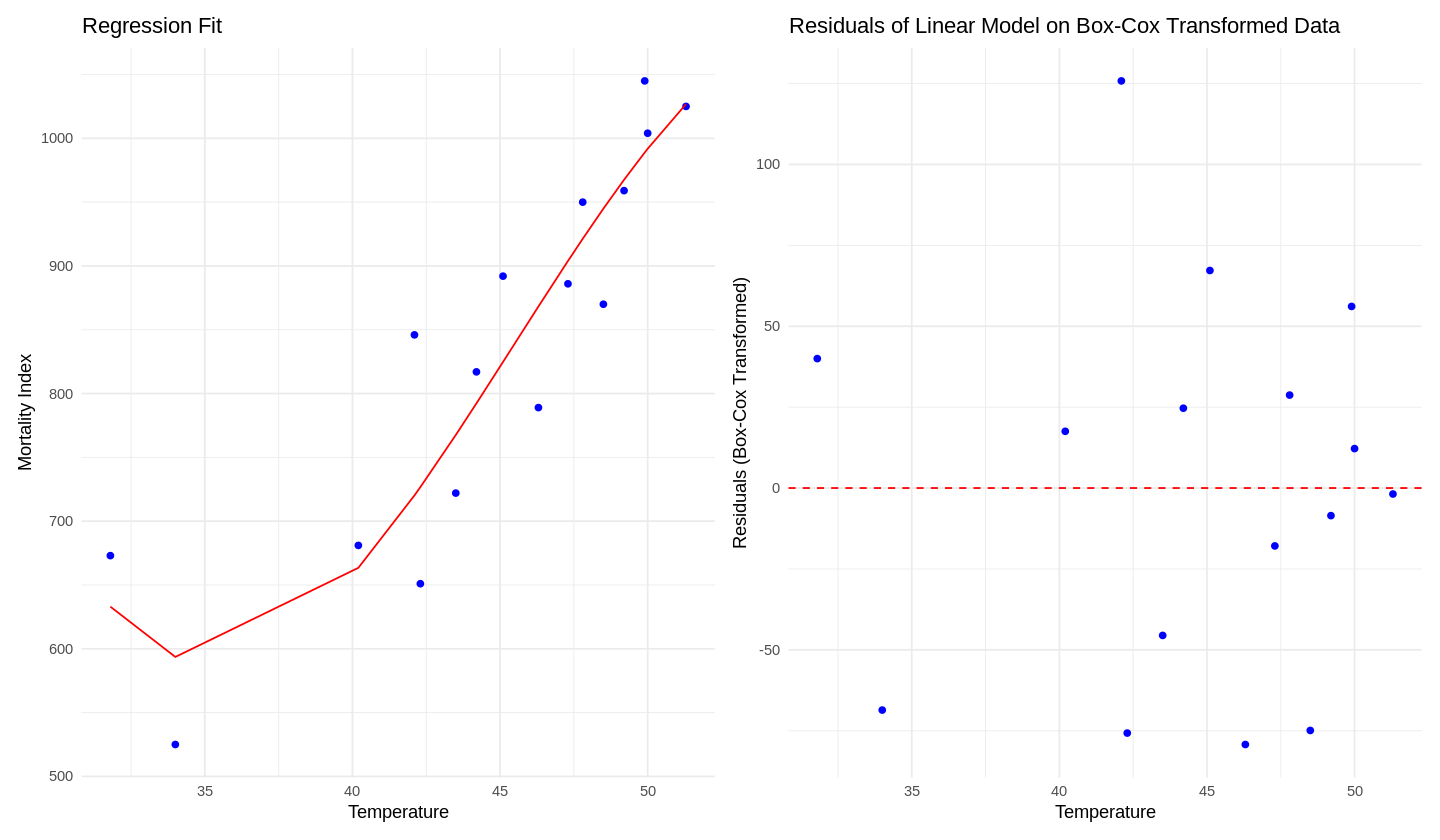

In [38]:
p1 <- ggplot(df_augmented, aes(x = temperature, y = mortality_index)) +
    geom_point(color = "blue") + 
    geom_line(aes(y = .fitted), color = "red") +  
    labs(title = "Regression Fit",
         x = "Temperature",
         y = "Mortality Index") +
    theme_minimal()


p2 <- ggplot(df_augmented, aes(x = temperature, y = .resid)) + 
    geom_point(color = "blue") +  
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") + 
    theme_minimal() +
    labs(title = "Residuals of Linear Model on Box-Cox Transformed Data",
         x = "Temperature",
         y = "Residuals (Box-Cox Transformed)")

p1 + p2 + plot_layout(widths = c(1, 1))

This graph is hollow up, we will now perform some transformations to straighten it out through the use of Box-Cox Transformations

In [35]:
box_cox <- function(y, tau) {
    if (any(y <= 0)) {
        stop("Box-Cox transformation requires y to be strictly positive.")
    }
    
    if (tau == 0) {
        return(log(y))  # Log transformation when tau = 0
    } else {
        return((y^tau - 1) / tau)
    }
}


`geom_smooth()` using formula = 'y ~ x'


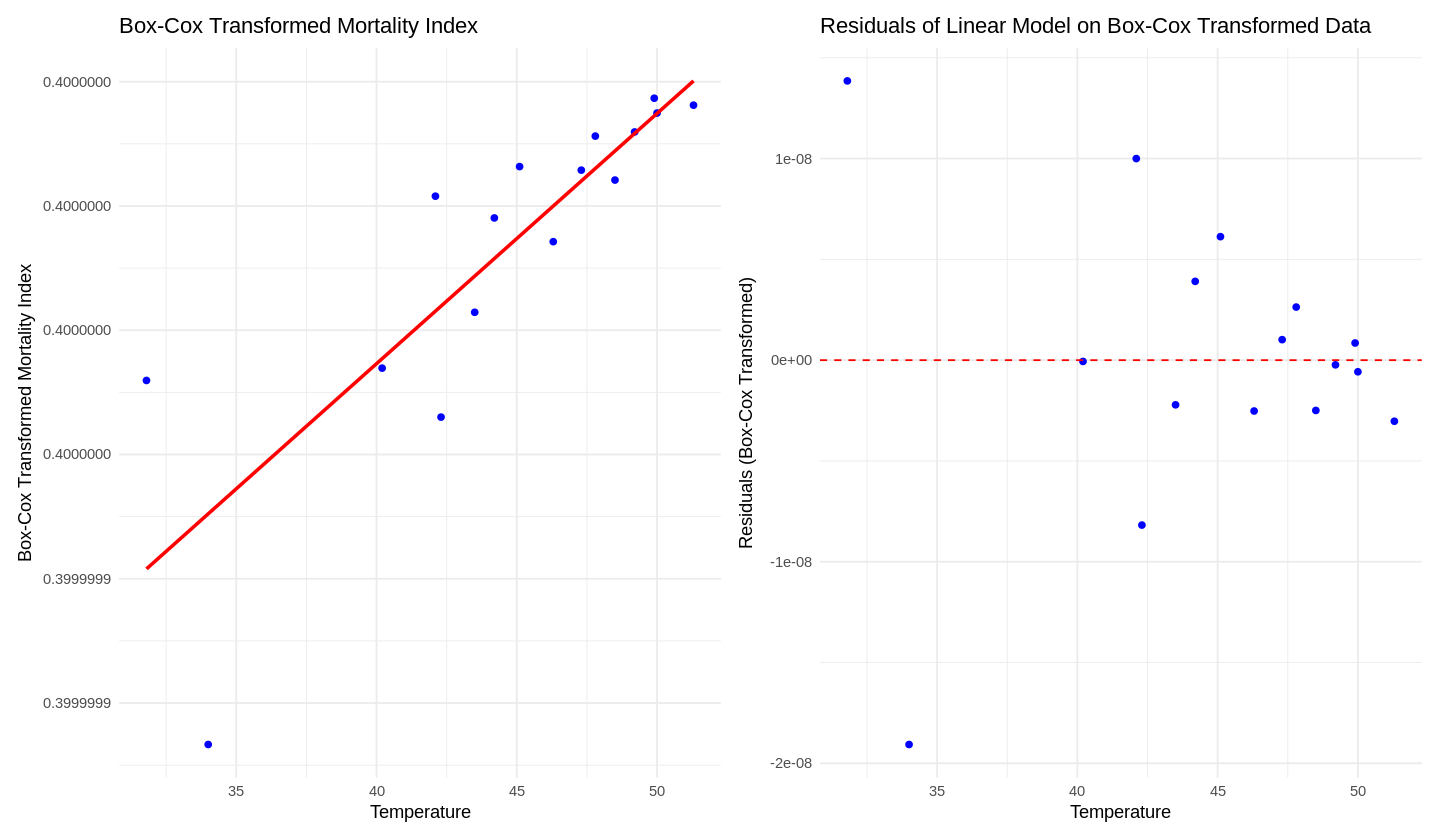

In [65]:

df_boxcox <- df  
df_boxcox$boxcox_mortality <- box_cox(df_boxcox$mortality_index, -2.5)
lm_boxcox <- lm(boxcox_mortality ~ temperature + I(temperature^2), data = df_boxcox)
df_boxcox_augmented <- augment(lm_boxcox)


p1 <- ggplot(df_boxcox_augmented, aes(x = temperature, y = boxcox_mortality)) +
    geom_point(color = "blue") +  
    stat_smooth(method = 'lm', se = FALSE, color = "red") +  
    theme_minimal() +
    labs(title = "Box-Cox Transformed Mortality Index",
         x = "Temperature",
         y = "Box-Cox Transformed Mortality Index")


p2 <- ggplot(df_boxcox_augmented, aes(x = temperature, y = .resid)) + 
    geom_point(color = "blue") +  
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") + 
    theme_minimal() +
    labs(title = "Residuals of Linear Model on Box-Cox Transformed Data",
         x = "Temperature",
         y = "Residuals (Box-Cox Transformed)")

p1 + p2 + plot_layout(widths = c(1, 1))
